In [19]:
#  Does a correlation between age, entry date, and net worth for all the candidates exist 2020 US Democratic Primary Candidates in December?

In [20]:
# Data

# I found campaign information from 2020 United States presidential election page on Wikipedia.

# I found a concise source of net worth for most candidates at Forbes.

In [21]:
import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Data Frame of project
df = pd.DataFrame({'Name' : ['Bloomberg, Mike', 'Steyer, Tom', 'Delaney, John', 'Bennet, Michael', 'Warren, Elizabeth', 
                             'Biden, Joe', 'Harris, Kamala', 'Sestak, Joe', 'ORourke, Beto', 'De Blasio, Bill', 'Sanders, Bernie',
                             'Inslee, Jay', 'Klobuchar, Amy', 'Booker, Cory', 'Bullock, Steve', 'Williamson, Marianne',
                             'Gillibrand, Kirsten', 'Moulton, Seth', 'Yang, Andrew', 'Castro, Julián', 'Gabbard, Tulsi',
                             'Ryan, Tim', 'Buttigieg, Pete', 'Gravel, Mike', 'Hickenlooper, John', 'Messam, Wayne',
                             'Ojeda, Richard', 'Patrick, Deval', 'Salwell, Eric'],
                   
                   'Birthdate' : ['1942-02-14', '1957-06-27', '1963-04-16', '1964-11-28', '1949-06-22', '1942-11-20', '1964-10-20',
                               '1951-12-12', '1972-09-26', '1961-05-08', '1941-09-08', '1951-02-09', '1960-05-25', '1969-04-27',
                               '1966-04-11', '1952-07-08', '1966-12-09', '1978-10-24', '1975-01-13', '1974-09-16', '1981-04-12',
                               '1973-07-16', '1982-01-19', '1930-05-13', '1952-02-07', '1974-06-07', '1970-09-25', '1956-07-31',
                               '1980-11-16'],
                   
                   'Worth' : [61800000000, 1600000000, 200000000, 15000000, 12000000, 9000000, 6000000, 6000000, 4000000, 2500000,
                              2500000, 2000000, 2000000, 1500000, 1500000, 1500000, 1000000, 1000000, 1000000, 700000, 500000, 500000,
                              100000, None, None, None, None, None, None],
                   
                   'Entry' : ['2019-11-24', '2019-07-09', '2017-07-28', '2019-05-02', '2019-02-11', '2019-04-25', '2019-01-21',
                              '2019-06-23', '2019-03-14', '2019-05-16', '2019-02-19', '2019-03-01', '2019-02-10', '2019-02-01',
                              '2019-05-14', '2019-01-28', '2019-03-17', '2019-04-22', '2017-11-06', '2019-01-12', '2019-01-11',
                              '2019-04-04', '2019-04-14', '2019-04-02', '2019-03-04', '2019-03-28', '2018-11-11', '2019-11-14',
                              '2019-04-08']}) 


df['Birthdate'] = df['Birthdate'].astype('datetime64[ns]')
df['Entry'] = df['Entry'].astype('datetime64[ns]')

maxi = max(df['Entry'])
mini = min(df['Entry'])

df['Age'] = ((datetime.datetime.now() - df['Birthdate'])/ np.timedelta64(1, 'D')).astype(int) / 365.25
df['Date'] = ((df['Entry'] - mini) / np.timedelta64(1, 'D')).astype(int)

<IPython.core.display.Javascript object>


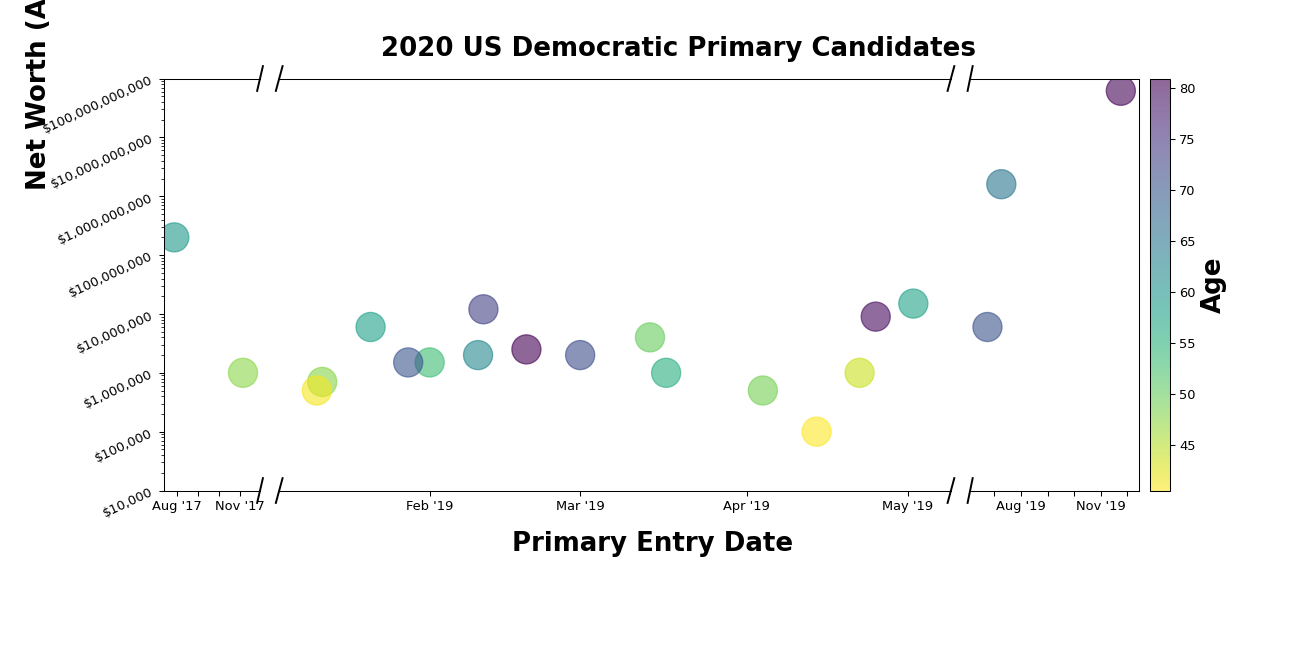

9

In [23]:
#Create base figure.
%matplotlib notebook
fig = plt.figure(figsize = (14, 7), dpi = 75, facecolor = 'w', edgecolor = 'k')
fig.text(x = 0.29, y = .915, s = '2020 US Democratic Primary Candidates', fontsize = 20, fontweight = "bold")
fig.text(x = 0.39, y = 0.16, s = 'Primary Entry Date', fontsize = 20, fontweight = "bold")
fig.text(x = 0.02, y = 0.72, s = "Net Worth (Aug '19)", fontsize = 20, fontweight = "bold", rotation = 90)
plt.rc('axes', labelsize = 20, labelweight = "bold")



#Left subplot.
ax1 = plt.subplot2grid((11, 9), (0, 0), rowspan = 9, colspan = 1)
ax1.axis([-15, 126, 10000, 100000000000])
#X-axis.
ax1.set_xticks([4, 35, 65, 96])
ax1.set_xticklabels(["Aug '17", "", "", "Nov '17"])
ax1.xaxis.label.set_visible(False)
#Y-axis.
ax1.set_yscale('log')
ax1.set_yticks([10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000])
ax1.set_yticklabels(["$10,000", "$100,000", "$1,000,000", "$10,000,000", "$100,000,000", "$1,000,000,000", "$10,000,000,000", "$100,000,000,000"], rotation = 25)
ax1.yaxis.label.set_visible(False)
ax1.spines['right'].set_visible(False)
#Subplot.
df.plot.scatter('Date', 'Worth', c = 'Age', s = 500, cmap = 'viridis_r', colorbar = False, alpha = 0.6, ax = ax1)



#Center subplot, 3/4 of figure.
ax2 = plt.subplot2grid((11, 9), (0, 1), rowspan = 9, colspan = 6)
ax2.axis([525, 650, 10000, 100000000000])
#X-axis.
ax2.set_xticks([553, 581, 612, 642])
ax2.set_xticklabels(["Feb '19", "Mar '19", "Apr '19", "May '19"])
ax2.xaxis.label.set_visible(False)
#Y-axis.
ax2.set_yscale('log')
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yticks([])
ax2.set_yticks([], minor = True)
ax2.yaxis.label.set_visible(False)
#Subplot.
df.plot.scatter('Date', 'Worth', c = 'Age', s = 500, cmap = 'viridis_r', colorbar = False, alpha = 0.6, ax = ax2)



#Right subplot, 1/8 of figure.
ax3 = plt.subplot2grid((11, 9), (0, 7), rowspan = 9, colspan = 2)
ax3.axis([675, 870, 10000, 100000000000])
#X-axis.
ax3.set_xticks([703, 734, 765, 795, 826, 856])
ax3.set_xticklabels([" ", "Aug '19", " ", " ", "Nov '19", " "])
ax3.xaxis.label.set_visible(False)
#Y-axis.
ax3.set_yscale('log')
ax3.spines['left'].set_visible(False)
ax3.set_yticks([])
ax3.set_yticks([], minor = True)
ax3.yaxis.label.set_visible(False)
#Subplot.
df.plot.scatter('Date', 'Worth', c = 'Age', s = 500, cmap = 'viridis_r', alpha = 0.6, ax = ax3)



### Diagonal breaks.
d = .030
d2 = .005
d3 = .015
#Left plot right breaks.
kwargs = dict(transform = ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d),(1-d, 1+d), **kwargs)
#Center plot left breaks.
kwargs.update(transform = ax2.transAxes)
ax2.plot((-d2, +d2), (1-d, 1+d), **kwargs)
ax2.plot((-d2, +d2), (-d, +d), **kwargs)
#Center plot right breaks.
ax2.plot((1-d2, 1+d2), (1-d, 1+d), **kwargs)
ax2.plot((1-d2, 1+d2), (-d, +d), **kwargs)
#Right plot left breaks.
kwargs.update(transform = ax3.transAxes)
ax3.plot((-d3, +d3), (1-d, 1+d), **kwargs)
ax3.plot((-d3, +d3), (-d, +d), **kwargs)



#Footnote
ax4 = plt.subplot2grid((11, 9), (10, 0), rowspan = 1, colspan = 9)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xticks([])
ax4.set_yticks([])



#Mouse click.  Outputs Name, Age, Worth, and Entry Date in footnote.
def onclick(event):
    plt.sca(ax4)
    plt.cla()
    ax4.set_xticks([])
    ax4.set_yticks([])
    
    for i in range(len(df)) :
        e = ((df['Entry'][i] - mini) / np.timedelta64(1, 'D')).astype(int)
        w = df['Worth'][i]
        
#If the click is within 3 days of the entry date and a reasonable multiple (above or below) the center worth,
#then grab data from dataframe related to that point.

        if ((event.xdata > e - 3) and (event.xdata < e + 3) and (event.ydata > w / 1.6) and (event.ydata < w * 1.6)) :
            age_out = int(df['Age'][i])
            entry_out = df['Entry'][i].strftime("%B %d, %Y")
            n = df['Name'][i].split(", ")
            name_out = n[1] + " " + n[0]
            worth_out = ("$"+('{:,}'.format(int(w))))
    
    plt.gca().text(x = -0.05, y = 0,
                   fontsize = 14)

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)